# 결정 트리 decision tree
결정 트리 decision tree는 분류와 회귀 문제에 널리 사용하는 모델이다.

scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있다.   
scikit-learn은 사전 가지치기만 지원한다.

### 필요한 패키지를 import

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### 유방암 자료

- sklearn 에서 제공하는 유방암 자료를 불러 읽어들인다.
- train data와 test data로 나눈다.

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

### Decision Tree모형의 생성

- DecisionTreeClassifier로 분류를 위한 결정트리를 생성한다.
- train dataset에서의 분류정확도와 test dataset에서의 분류정확도를 확인한다.

In [3]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


### Overfitting의 해결
- max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분하다.

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))


Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


### Decision Tree 시각화
graphviz 모듈은 pip install graphviz 명령으로 설치한다.  

In [ ]:
!pip install graphviz

In [5]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/aonek_000/Anaconda3/Library/bin/graphviz'

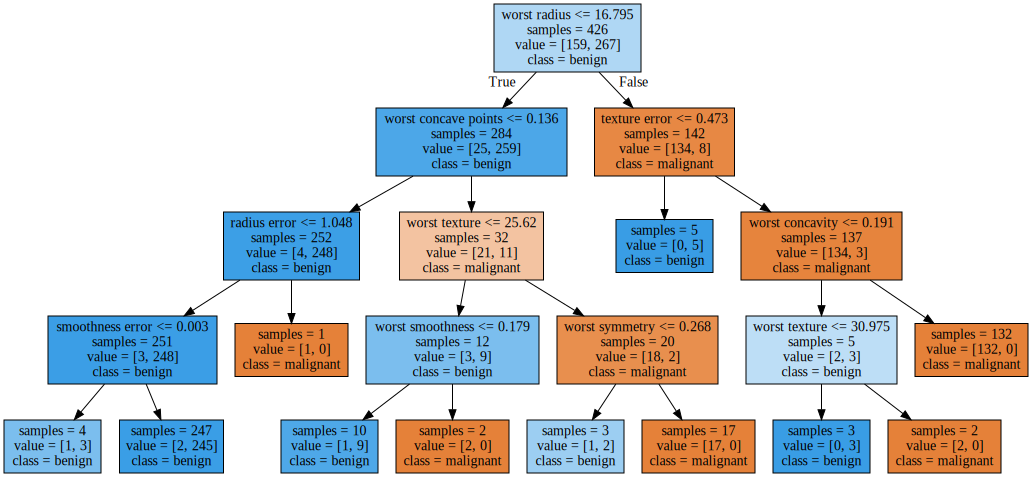

In [6]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', 
                class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
                impurity=False, filled=True)


with open("cancertree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


### dot 파일을 png파일로 저장하기

다음과 같은 명령어를 실행하면 트리를 png 파일로 저장할 수 있다. 

In [7]:
!dot -Tpng cancertree.dot -o cancertree.png

![](cancertree.png)

### 변수의 중요도

In [8]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


### 변수의 중요도를 시각화

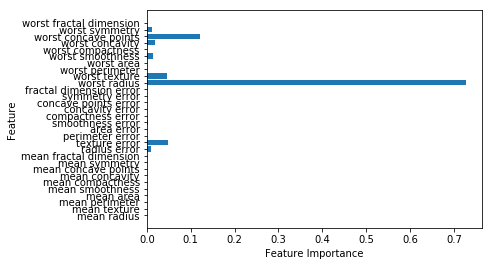

In [11]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()